In [1]:
import obspy
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from obspy.io.sac.util import get_sac_reftime
from IPython.display import clear_output

In [2]:
root_dir = "/home/elemento/Music/My"
os.listdir(root_dir)

['response_check.ipynb',
 '9_quich_view.ipynb',
 'exploring.ipynb',
 'README.md',
 '7_filter_waveform.ipynb',
 '8_select_snr.ipynb',
 '6_parrival.ipynb',
 '5_mseed2sac_NSFE.ipynb',
 'Download_NSFE',
 '.ipynb_checkpoints',
 '5_mseed2sac_NEFS.ipynb',
 'Events']

In [3]:
provider = "IRIS"
year1 = 2021
year2 = 2022

data_sac = f'{root_dir}/Download_NSFE/{provider}/SAC/{year1}'
os.listdir(data_sac)

['20210101012009649']

In [4]:
# https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html
# A look into how the frequencies are calculated
print(np.fft.fftfreq(10))
print(np.fft.fftfreq(20))
print(np.fft.fftfreq(40))

[ 0.   0.1  0.2  0.3  0.4 -0.5 -0.4 -0.3 -0.2 -0.1]
[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45 -0.5  -0.45
 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05]
[ 0.     0.025  0.05   0.075  0.1    0.125  0.15   0.175  0.2    0.225
  0.25   0.275  0.3    0.325  0.35   0.375  0.4    0.425  0.45   0.475
 -0.5   -0.475 -0.45  -0.425 -0.4   -0.375 -0.35  -0.325 -0.3   -0.275
 -0.25  -0.225 -0.2   -0.175 -0.15  -0.125 -0.1   -0.075 -0.05  -0.025]


In [5]:
def plot_fourier_bef_after(freq, coef_before, coef_after):
    """
    A function to plot fourier transform before and after applying Bandpass filtering
    """
    
    print("Magnitude vs Frequencies | Fourier Transform:")
    fig, ax = plt.subplots(1, 2, figsize = (14, 5))

    ax[0].plot(freq, coef_before)
    ax[0].set_title("Before Bandpass Filtering")
    ax[0].set_xlabel("Frequencies (in Hz)")
    ax[0].set_ylabel("Magnitude of Fourier Coefficients (in log scale)") 

    ax[1].plot(freq, coef_after)
    ax[1].set_title("After Bandpass Filtering")
    ax[1].set_xlabel("Frequencies (in Hz)")
    ax[1].set_ylabel("Magnitude of Fourier Coefficients (in log scale)") 

    plt.show()

For Event: 20210101012009649 

Original Signal (before any re-sampling or filtering):
Length of Trace:  72000
Sampling Rate of Trace:  20.0
Duration of Trace:  3600.0 

         network: MM
         station: KTA
        location: 
         channel: HHZ
       starttime: 2021-01-01T01:20:09.650000Z
         endtime: 2021-01-01T02:20:09.600000Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 72000
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.05, 'depmin': -5.281559e-05, 'depmax': 4.626246e-05, 'scale': 1.0, 'b': 0.001, 'e': 3599.9512, 'o': 0.0, 't1': 820.82227, 'stla': 24.179361, 'stlo': 96.340195, 'stel': 120.4, 'evla': -31.3191, 'evlo': -177.9341, 'evdp': 10.0, 'mag': 5.0, 'dist': 10991.634, 'az': 292.77924, 'baz': 120.26551, 'gcarc': 98.850136, 'depmen': -1.3545879e-06, 'cmpaz': 0.0, 'cmpinc': -90.0, 'nzyear': 2021, 'nzjday': 1, 'nzhour': 1, 'nzmin': 20, 'nzsec': 9, 'nzmsec': 649, 'nvhdr': 6, 'npts': 72000, 'iftype': 1, 'iztype':

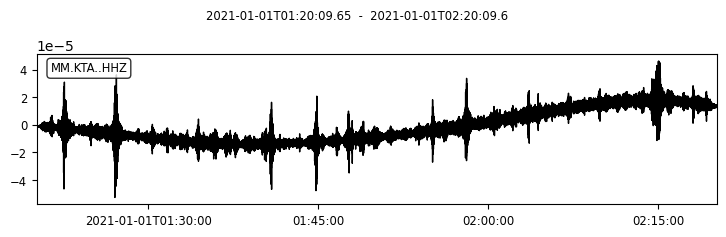

After Sampling to 40Hz:
Length of Trace:  144000
Sampling Rate of Trace:  40.0
Duration of Trace:  3600.0


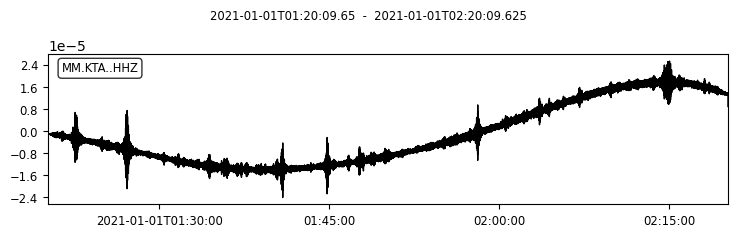

THE SIGNAL HAS BEEN RESET!

Before any kind of Filtering:


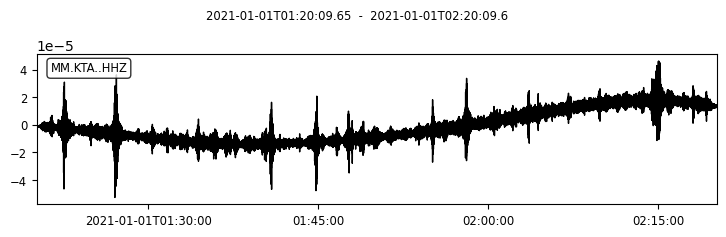

After removing the mean:


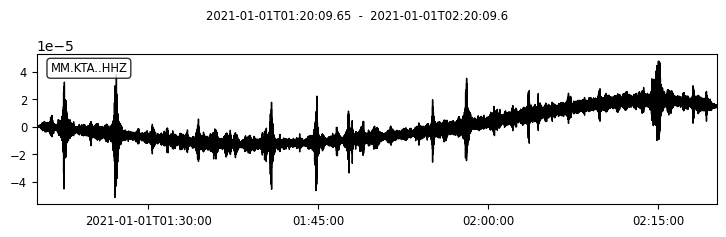

After removing any linear trend (if present):


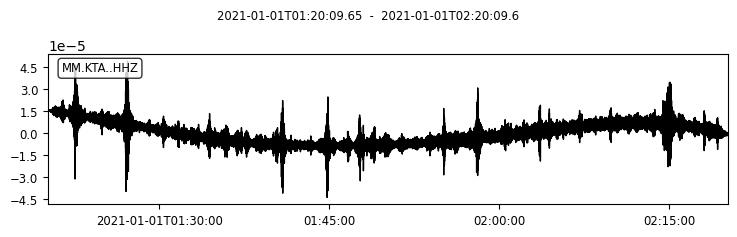

After tapering the signal:


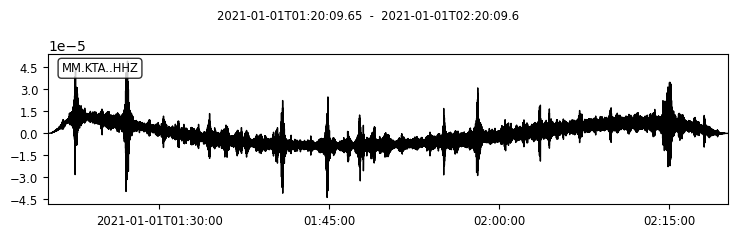

After applying bandpass filter:


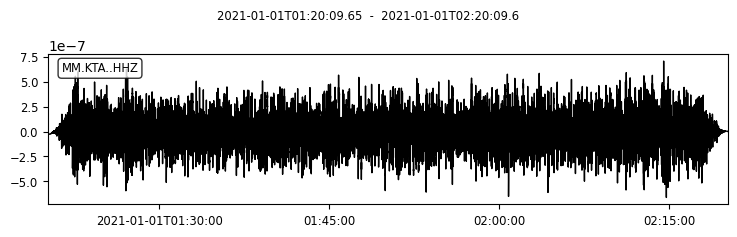

Magnitude vs Frequencies | Fourier Transform:


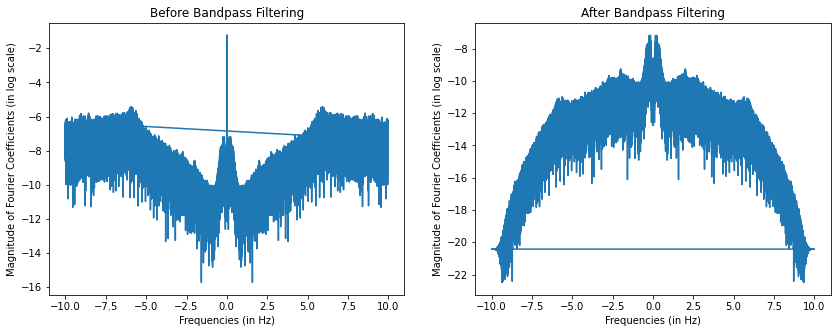

As can be seen in the above plots, the components corresponding to frequencies between 0.02 Hz and 2 Hz have been retained, and the rest of the components have been greatly eliminated


In [6]:
# Iterating over all the events
for ev in os.listdir(data_sac):
    print("For Event:", ev, "\n")
    inpath = os.path.join(data_sac, ev)

    # Iterating over all the SAC files
    for sac in glob.glob(f"{inpath}/*.SAC"):
        try:
            st = obspy.read(sac)
            tr = st[0].copy()
            
            print("Original Signal (before any re-sampling or filtering):")
            print("Length of Trace: ", len(tr))
            print("Sampling Rate of Trace: ", tr.stats.sampling_rate)
            print("Duration of Trace: ", len(tr) / tr.stats.sampling_rate, "\n")
            print(tr.stats)
            tr.plot()
            plt.show()
            
            tr.resample(40.0)
            
            print("After Sampling to 40Hz:")
            print("Length of Trace: ", len(tr))
            print("Sampling Rate of Trace: ", tr.stats.sampling_rate)
            print("Duration of Trace: ", len(tr) / tr.stats.sampling_rate)
            tr.plot()
            plt.show()
            
            print("THE SIGNAL HAS BEEN RESET!\n")
            
            print("Before any kind of Filtering:")
            st[0].plot()
            plt.show()
            
            st.detrend("demean")
            
            print("After removing the mean:")
            st[0].plot()
            plt.show()
            
            st.detrend("linear")
            
            print("After removing any linear trend (if present):")
            st[0].plot()
            plt.show()
            
            st.taper(max_percentage=0.05, type='hann')
            
            print("After tapering the signal:")
            st[0].plot()
            plt.show()
        
            # Fourier Coefficients before applying band-pass filter
            fft_before = np.fft.fft(st[0])
            coef_before = np.log(abs(fft_before)) # Logarithmic Scale
            
            st.filter('bandpass', freqmin=0.02, freqmax=2.0, corners=2, zerophase="TRUE")
            
            # Fourier Coefficients after applying band-pass filter
            fft_after = np.fft.fft(st[0])
            coef_after = np.log(abs(fft_after)) # Logarithmic Scale
            
            print("After applying bandpass filter:")
            st[0].plot()
            plt.show()
            
            # Frequencies for Fourier Transform
            freq = np.fft.fftfreq(len(st[0])) * st[0].stats.sampling_rate
            
            # Calling the function
            plot_fourier_bef_after(freq, coef_before, coef_after)
            
            print("As can be seen in the above plots, the components corresponding to frequencies " +
            "between 0.02 Hz and 2 Hz have been retained, and the rest of the components have been " +
            "greatly eliminated")
            
            st[0].write(sac+".bp", format='SAC')
                        
            # Breaking after a single file
            break
            
        except:
            continue

In [31]:
# Filter data (Noise values, Signal values and Threshold)
TNoise1 = -80   # Noise window_left before t1
TNoise2 = -30   # Noise window_right before t1
TSignal1 = -20  # Signal window_left before t1
TSignal2 = 30   # Signal window_right after t1
thresh = 3.0    # Threshold to select data

In [48]:
# It has some ".bp" files by default

# Iterating over all the events
for ev in os.listdir(data_sac):
    print("For Event:", ev)
    inpath = os.path.join(data_sac, ev)
    os.chdir(inpath)
    
    # Open the info file
    f = open("snr.info", "w")
    i = 1

    # Iterating over all the SAC files
    for sac in glob.glob("*.SAC.bp"):
        st = obspy.read(sac)
        sac_stats = st[0].stats.sac
        
        print(f"\nFOR SIGNAL {i}:")
        i += 1
        
        for stat, val in sac_stats.items():
            if stat.startswith("n"):
                print(stat, val)

        # Builds the reference time from SAC “nz” time fields. 
        sac_reftime = get_sac_reftime(sac_stats)
        T = sac_reftime + sac_stats.t1

        print("\nStarting Instance for the Signal:", sac_reftime)
        print("Arrival Time for P-phase wrt the Starting Instance:", st[0].stats.sac.t1)
        print("Arrival Time for P-phase:", T)
        
        # Measure noise level; 50s Window & 20Hz frequency = 1000 samples
        tr = st[0].copy()
        tr.trim(starttime = T + TNoise1, endtime = T + TNoise2, pad=True, fill_value=0)
        Noisamean = sum(abs(tr.data)) / len(tr.data)
        print("\nLength of Original Signal:", len(st[0]))
        print("Length of Trimmed Signal:", len(tr))
        print("Noise Level:", Noisamean)
        
        # Measure signal level; 50s Window & 20Hz frequency = 1000 samples
        tr = st[0].copy()
        tr.trim(starttime = T + TSignal1, endtime = T + TSignal2, pad=True, fill_value=0)
        SignMax = max(abs(tr.data))
        print("\nLength of Original Signal:", len(st[0]))
        print("Length of Trimmed Signal:", len(tr))
        print("Signal Level:", SignMax)
        
        # Define the signal to noise ratio value
        snr = SignMax/Noisamean
        print("\nSignal-to-Noise Ratio (SNR):", snr)
        
        f.write("{} {}\n".format(snr,sac))
        
        # At this point, we remove the signals having SNR < thresh (3.0)
        if (snr < thresh):
            # os.remove(sac)
            print("Removed {} which has a low SNR: {:.2f}".format(sac,snr))
        
        # Breaking after a single file
        # break
            
    # Close the info file
    f.close()

For Event: 20210101012009649

FOR SIGNAL 1:
nzyear 2021
nzjday 1
nzhour 1
nzmin 20
nzsec 9
nzmsec 649
nvhdr 6
npts 72000

Starting Instance for the Signal: 2021-01-01T01:20:09.649000Z
Arrival Time for P-phase wrt the Starting Instance: 802.58997
Arrival Time for P-phase: 2021-01-01T01:33:32.238966Z

Length of Original Signal: 72000
Length of Trimmed Signal: 1001
Noise Level: 2.1259316356493083e-07

Length of Original Signal: 72000
Length of Trimmed Signal: 1001
Signal Level: 5.9809867e-07

Signal-to-Noise Ratio (SNR): 2.8133485370632108
Removed MM.KTN..HHZ.SAC.bp which has a low SNR: 2.81

FOR SIGNAL 2:
nzyear 2021
nzjday 1
nzhour 1
nzmin 20
nzsec 9
nzmsec 649
nvhdr 6
npts 72000

Starting Instance for the Signal: 2021-01-01T01:20:09.649000Z
Arrival Time for P-phase wrt the Starting Instance: 800.6207
Arrival Time for P-phase: 2021-01-01T01:33:30.269728Z

Length of Original Signal: 72000
Length of Trimmed Signal: 1001
Noise Level: 1.2489784149368168e-07

Length of Original Signal: 72000